In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error


In [3]:
# Load CSV
df = pd.read_csv("housing.csv")

# View first few rows
print(df.head())


FileNotFoundError: [Errno 2] No such file or directory: 'housing.csv'

In [4]:
import zipfile
import pandas as pd

# Open the zip file
with zipfile.ZipFile("archive (6).zip", 'r') as zip_ref:
    # Show all files inside the zip
    print(zip_ref.namelist())  # Helps you confirm the exact CSV file name
    
    # Load the CSV file inside the zip
    with zip_ref.open("housing.csv") as file:
        df = pd.read_csv(file)

# Check first few rows
print(df.head())


FileNotFoundError: [Errno 2] No such file or directory: 'archive (6).zip'

In [16]:
import zipfile
import pandas as pd

# Use full path to your ZIP file (escaped backslashes or raw string)
zip_path = r"C:\Users\anees\Downloads\archive (6).zip"

# Open the ZIP and inspect contents
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    print("Files in ZIP:", zip_ref.namelist())  # Check the internal file name

    # Assuming the file inside is called exactly 'housing.csv'
    with zip_ref.open("housing.csv") as file:
        df = pd.read_csv(file)

# 🔧 Drop the non-numeric column that breaks Streamlit
df = df.drop("ocean_proximity", axis=1)

# Show first few rows
print(df.head())


Files in ZIP: ['housing.csv']
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  
0       322.0       126.0         8.3252            452600.0  
1      2401.0      1138.0         8.3014            358500.0  
2       496.0       177.0         7.2574            352100.0  
3       558.0       219.0         5.6431            341300.0  
4       565.0       259.0         3.8462            342200.0  


In [17]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)


In [6]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Make a copy to work with
housing = df.copy()

# Convert categorical 'ocean_proximity' to numerical using one-hot encoding
housing = pd.get_dummies(housing)

# Handle missing values (SimpleImputer will fix 'total_bedrooms' NaNs)
imputer = SimpleImputer(strategy="median")
housing_imputed = pd.DataFrame(imputer.fit_transform(housing), columns=housing.columns)


In [19]:
X = df_imputed.drop("median_house_value", axis=1)
y = df_imputed["median_house_value"]


In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    print(f"{name}: RMSE = {rmse:.2f}, MAE = {mae:.2f}")


Linear Regression: RMSE = 70851.00, MAE = 51665.94
Decision Tree: RMSE = 73027.16, MAE = 47100.55
Random Forest: RMSE = 51448.28, MAE = 33671.27


In [22]:
import joblib

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

joblib.dump(rf_model, "best_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("✅ Model and scaler saved successfully.")


✅ Model and scaler saved successfully.


In [18]:
df_imputed["rooms_per_household"] = df_imputed["total_rooms"] / df_imputed["households"]


In [7]:
housing_imputed["rooms_per_household"] = housing_imputed["total_rooms"] / housing_imputed["households"]


In [8]:
X = housing_imputed.drop("median_house_value", axis=1)
y = housing_imputed["median_house_value"]


In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}

# Compare RMSE and MAE
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    print(f"{name}: RMSE = {rmse:.2f}, MAE = {mae:.2f}")


Linear Regression: RMSE = 69840.28, MAE = 50551.64
Decision Tree: RMSE = 70150.04, MAE = 44328.00
Random Forest: RMSE = 48881.79, MAE = 31602.45


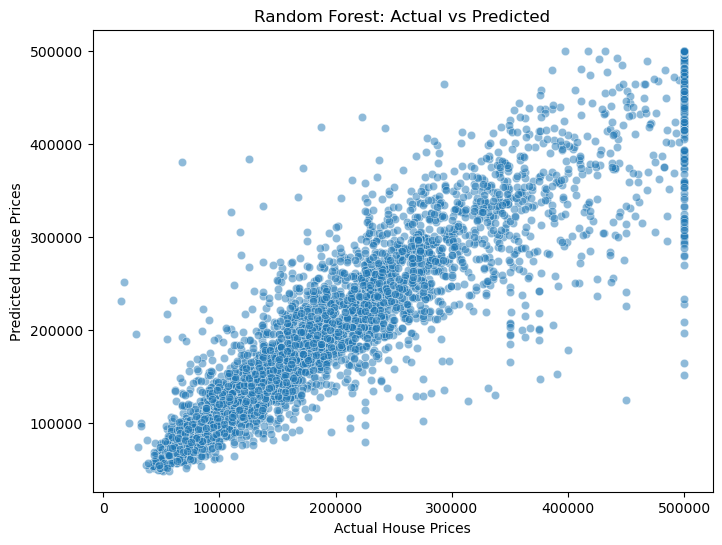

In [11]:
best_model = RandomForestRegressor()
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Random Forest: Actual vs Predicted")
plt.show()


In [13]:
best_model = None  # Placeholder

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    print(f"{name}: RMSE = {rmse:.2f}, MAE = {mae:.2f}")
    
    if name == "Random Forest":
        best_model = model  # Save the Random Forest model


Linear Regression: RMSE = 69840.28, MAE = 50551.64
Decision Tree: RMSE = 70672.63, MAE = 44938.75
Random Forest: RMSE = 48861.69, MAE = 31549.14


In [14]:
import joblib

# Save the best model
joblib.dump(best_model, "best_model.pkl")

# Save the scaler (make sure it's named 'scaler' in your earlier code)
joblib.dump(scaler, "scaler.pkl")

print("✅ Model and scaler saved successfully.")


✅ Model and scaler saved successfully.


In [15]:
import os

print("Current working directory:", os.getcwd())


Current working directory: C:\Users\anees


In [1]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

# LOAD DATA from ZIP
import zipfile
zip_path = r"C:\Users\anees\Downloads\archive (6).zip"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    with zip_ref.open("housing.csv") as file:
        df = pd.read_csv(file)

# DROP ocean_proximity (non-numeric)
df = df.drop("ocean_proximity", axis=1)

# HANDLE missing values
imputer = SimpleImputer(strategy="median")
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# ADD rooms_per_household
df_imputed["rooms_per_household"] = df_imputed["total_rooms"] / df_imputed["households"]

# PREPARE FEATURES
X = df_imputed.drop("median_house_value", axis=1)
y = df_imputed["median_house_value"]

# SCALE FEATURES
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# SPLIT
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# TRAIN MODEL
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# SAVE model and scaler
joblib.dump(rf_model, "best_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("✅ Model and scaler saved successfully.")


✅ Model and scaler saved successfully.


C:\Users\anees\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


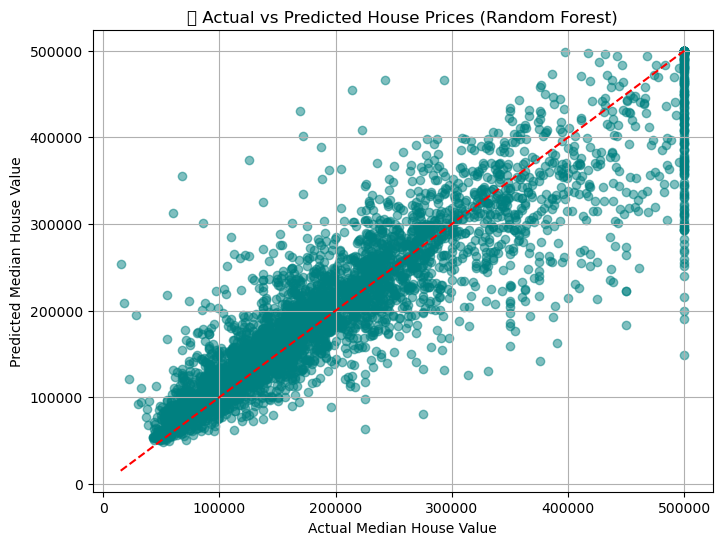

In [2]:
import matplotlib.pyplot as plt

# Use the best model: Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred = rf_model.predict(X_test)

# Scatter Plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('📊 Actual vs Predicted House Prices (Random Forest)')
plt.grid(True)
plt.show()
